# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
all_scores = []
for _ in range(100):
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    steps = 0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        steps += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    all_scores.append(scores)
    print('Total score (averaged over agents) this episode: {} took steps {}'.format(np.mean(scores),steps))

Total score (averaged over agents) this episode: 0.11449999744072556 took steps 1001
Total score (averaged over agents) this episode: 0.10899999756366015 took steps 1001
Total score (averaged over agents) this episode: 0.0584999986924231 took steps 1001
Total score (averaged over agents) this episode: 0.10549999764189125 took steps 1001
Total score (averaged over agents) this episode: 0.14849999668076636 took steps 1001
Total score (averaged over agents) this episode: 0.10249999770894647 took steps 1001
Total score (averaged over agents) this episode: 0.17049999618902803 took steps 1001
Total score (averaged over agents) this episode: 0.0894999979995191 took steps 1001
Total score (averaged over agents) this episode: 0.08299999814480544 took steps 1001
Total score (averaged over agents) this episode: 0.05549999875947833 took steps 1001
Total score (averaged over agents) this episode: 0.13899999689310788 took steps 1001
Total score (averaged over agents) this episode: 0.2174999951384961

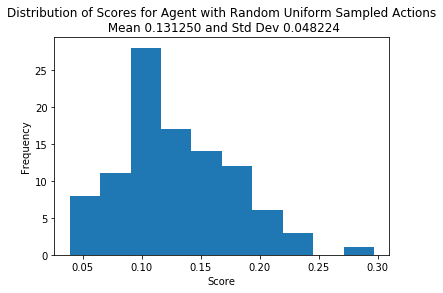

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('Score')
plt.ylabel('Frequency')
mean = np.mean([np.mean(score) for score in all_scores])
std = np.std([np.mean(score) for score in all_scores])
plt.title('Distribution of Scores for Agent with Random Uniform Sampled Actions\n Mean {:2f} and Std Dev {:2f}'.format(mean, std))
plt.hist([np.mean(score) for score in all_scores])
plt.savefig('reacher_20_arms_baseline.png')

In [5]:
from ddpg_agent import Agent
agent = Agent(state_size=33, action_size=4, random_seed=0)

In [6]:
import workspace_utils

import random
import torch
import numpy as np
from collections import deque

import matplotlib.pyplot as plt
%matplotlib inline

number_of_agents = 20
prefill_episodes = 10

def ddpg(n_episodes=500, max_t=3000):
    score_deque = deque(maxlen=100)
    score = []
    scorelist = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment  
        states = env_info.vector_observations                 # get the current state
        agent.reset()
        scores = np.zeros(number_of_agents)
        for t in range(max_t):
            actions = None
            if i_episode>=prefill_episodes:
                actions = agent.act(states)
            else:
                actions = np.random.randn(number_of_agents, action_size) # select an action (for each agent)
                actions = np.clip(actions, -1, 1)
                
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            #next_state, reward, done, _ = env.step(action)
            next_states = env_info.vector_observations       # get the next state
            rewards = env_info.rewards                        # get the reward
            dones = env_info.local_done                       # see if episode has finished

            agent.step_add_to_memory(states, actions, rewards, next_states, dones)
            
            if i_episode>=prefill_episodes:
                agent.step_learn()
            
            states = next_states
            scores += env_info.rewards
            
            if np.any(dones):
                break
        scorelist.append(scores)
        
        score_mean = np.mean(scores)
        score_min = np.min(scores)
        score_max = np.max(scores)
        score_deque.append(score_mean)
        score.append(score_mean)
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore mean: {:.2f} \tScore min: {:.2f} \tScore max: {:.2f} '.format(i_episode, np.mean(score_deque), score_mean, score_min, score_max), end="\n")
        if i_episode % 10 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {}'.format(i_episode, np.mean(score_deque)))
        if np.mean(score_deque)>35.0:
            print("\rSolved\n")
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_final.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_final.pth')
            break
    return scorelist

from workspace_utils import active_session

scores = []
with active_session():
    scores = ddpg()

Episode 1	Average Score: 0.08	Score mean: 0.08 	Score min: 0.00 	Score max: 0.43 
Episode 2	Average Score: 0.38	Score mean: 0.68 	Score min: 0.30 	Score max: 1.27 
Episode 3	Average Score: 0.53	Score mean: 0.82 	Score min: 0.07 	Score max: 1.63 
Episode 4	Average Score: 0.64	Score mean: 0.98 	Score min: 0.35 	Score max: 2.22 
Episode 5	Average Score: 0.69	Score mean: 0.90 	Score min: 0.00 	Score max: 1.95 
Episode 6	Average Score: 0.70	Score mean: 0.74 	Score min: 0.04 	Score max: 1.78 
Episode 7	Average Score: 0.70	Score mean: 0.68 	Score min: 0.11 	Score max: 1.88 
Episode 8	Average Score: 0.71	Score mean: 0.83 	Score min: 0.13 	Score max: 1.47 
Episode 9	Average Score: 0.73	Score mean: 0.85 	Score min: 0.21 	Score max: 1.57 
Episode 10	Average Score: 0.78	Score mean: 1.20 	Score min: 0.35 	Score max: 2.01 
Episode 10	Average Score: 0.775599982663989
Episode 11	Average Score: 0.82	Score mean: 1.26 	Score min: 0.23 	Score max: 2.00 
Episode 12	Average Score: 0.84	Score mean: 1.06 	Sco

In [7]:
import pickle
pickle.dump(scores, open( "scores.p", "wb" ))

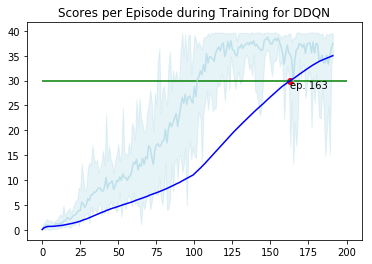

In [8]:
from collections import deque
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

scores = pickle.load( open( "scores.p", "rb" ) )

scores_avg = []
scores_window = deque(maxlen=100)
success = False
for i,x in enumerate(scores):
    
    scores_window.append(np.mean(x))
    m = np.mean(scores_window)
    if m>30 and success == False:
        x_success = i
        y_success = m
        success = True
    scores_avg.append(np.mean(scores_window))
plt.plot([np.mean(x) for x in scores],color='lightblue',alpha=0.7)
mins = [np.min(x) for x in scores]
maxs = [np.max(x) for x in scores]

plt.fill_between(list(range(len(mins))),mins,maxs,color='lightblue',alpha=0.3)

plt.plot(scores_avg, color='blue')
plt.scatter(x_success,y_success, color='red')
plt.text(x_success,y_success-1.5,"ep. {}".format(x_success))
plt.hlines(30.0,0,200, color='green')
plt.title("Scores per Episode during Training for "+ "DDQN")
plt.savefig('learning_ddqn.png')

# Run experiment with final agent

In [ ]:
#import torch
#from ddpg_agent import Agent
#agent = Agent(state_size=33, action_size=4, random_seed=0)

#agent.actor_target.load_state_dict(torch.load('checkpoint_actor.pth'))
#agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
#agent.critic_target.load_state_dict(torch.load('checkpoint_critic.pth'))
#agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

Episode 0	Average Score: 38.439999140799046 32.28999927826226 39.64999911375344
Episode 1	Average Score: 38.19099914636463 34.759999223053455 39.65999911352992
Episode 2	Average Score: 37.947999151796104 31.809999288991094 39.61999911442399
Episode 3	Average Score: 37.201499168481675 30.529999317601323 39.62999911420047
Episode 4	Average Score: 38.42399914115667 33.9899992402643 39.559999115765095
Episode 5	Average Score: 38.451499140542 36.5699991825968 39.61999911442399
Episode 6	Average Score: 37.416999163664876 30.39999932050705 39.54999911598861
Episode 7	Average Score: 38.46349914027378 35.74999920092523 39.599999114871025
Episode 8	Average Score: 37.92799915224314 35.55999920517206 39.6699991133064
Episode 9	Average Score: 37.85399915389716 34.3899992313236 39.58999911509454
Episode 10	Average Score: 38.91999913007021 37.05999917164445 39.599999114871025
Episode 11	Average Score: 38.56699913796037 33.58999924920499 39.60999911464751
Episode 12	Average Score: 38.65149913607165 35

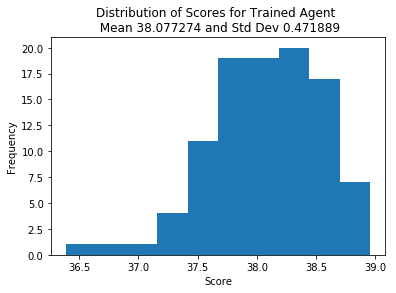

In [9]:
from collections import deque

scorelist = []
score = []
number_of_agents = 20

with active_session():
    for i_episode in range(100):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment  
        states = env_info.vector_observations                 # get the current state
        agent.reset()
        scores = np.zeros(number_of_agents)
        for t in range(2000):
            actions = None
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations       # get the next state
            rewards = env_info.rewards                        # get the reward
            dones = env_info.local_done                       # see if episode has finished
            states = next_states
            scores += env_info.rewards

            if np.any(dones):
                break
        scorelist.append(scores)

        score_mean = np.mean(scores)
        score_min = np.min(scores)
        score_max = np.max(scores)
        score.append(score_mean)

        print('\rEpisode {}\tAverage Score: {} {} {}'.format(i_episode, score_mean, score_min, score_max))

    pickle.dump(scorelist, open( "scores_eval.p", "wb" ))

plt.xlabel('Score')
plt.ylabel('Frequency')
mean = np.mean([np.mean(score) for score in scorelist])
std = np.std([np.mean(score) for score in scorelist])
plt.title('Distribution of Scores for Trained Agent \n Mean {:2f} and Std Dev {:2f}'.format(mean, std))
plt.hist([np.mean(score) for score in scorelist])
plt.savefig('reacher_20_arms_solved.png')